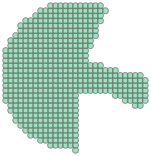

In [107]:
import pickle
from shapely import MultiPoint
import numpy as np

resolution = 5

with open('equipment.pkl', 'rb') as f:
    polygon = pickle.load(f)
    polygon = polygon.polygon

valid_points = np.array(polygon.exterior.coords)
lonmin, latmin, lonmax, latmax = polygon.bounds

# construct rectangle of points
X, Y = np.round(np.meshgrid(np.arange(lonmin, lonmax, resolution), np.arange(latmin, latmax, resolution)),4)
points = MultiPoint(np.vstack((X.flatten(),Y.flatten())).T)
mp = points.intersection(polygon)
np.array(mp.geoms)
mp
# valid_points

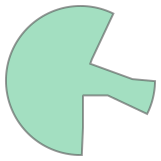

In [91]:
polygon

[(135.0, 210.0), (137.63207895738935, 209.9538001729203), (140.26091520564026, 209.81525760965513), (142.883270030617, 209.58454299400364), (145.49591270326744, 209.26194056530835), (148.09562445986626, 208.84784776827388), (150.6792024675172, 208.3427747633167), (153.24346377002823, 207.74734379804988), (155.78524920929897, 207.06228844067704), (158.30142731738897, 206.2884526762395), (160.78889817447168, 205.42678986683075), (163.24459722792142, 204.4783615770586), (165.66549906782808, 203.44433626620273), (168.04862115428818, 202.32598784867798), (146.4513594362368, 156.39575179628463), (144.80129628215732, 151.86224053977722), (145.45338843742255, 151.61334709849322), (146.12106662505656, 151.37033211212565), (146.8007078789339, 151.12296292573492), (147.49436069951363, 150.8704939461291), (148.2042296800173, 150.6121227669969), (148.93270582457922, 150.34697913400333), (149.682401647152, 150.07411216983314), (150.45619220432945, 149.79247543946428), (151.25726350211525, 149.500909

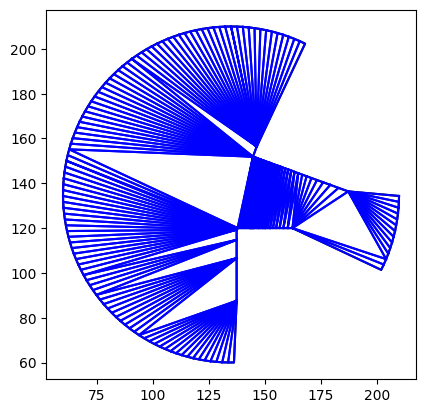

In [49]:
import triangle
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import numpy as np

# Step 1: Define the polygon
# poly_coords = [(0, 0), (4, 0), (4, 4), (2, 2), (0, 4), (0, 0)]
# polygon = Polygon(poly_coords)

# Step 2: Prepare data for triangulation
vertices = list(polygon.exterior.coords)
segments = [(i, (i + 1) % len(vertices)) for i in range(len(vertices) - 1)]

# Create the input dictionary for the triangle library
A = {
    'vertices': vertices,
    'segments': segments
}

# Step 3: Perform the triangulation
B = triangle.triangulate(A, 'p')

# Step 4: Visualize the triangulated mesh
def plot_triangulation(B):
    # Plot the original polygon
    x, y = zip(*vertices)
    plt.plot(x, y, 'k-')

    print(vertices)

    # Plot the triangulated mesh
    for tri in B['triangles']:
        pts = B['vertices'][tri]
        pts = np.vstack((pts, pts[0]))  # Close the triangle
        plt.plot(pts[:, 0], pts[:, 1], 'b-')

    plt.gca().set_aspect('equal')
    plt.show()

plot_triangulation(B)


[ 84 141 140]
[137.93240423 120.        ] [ 62.09536562 152.6043826 ] [ 61.52245971 150.03499495]


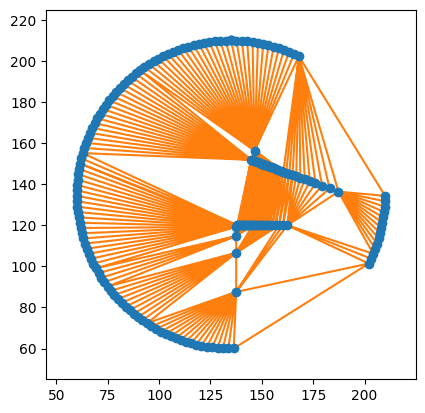

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, delaunay_plot_2d
from shapely.geometry import Polygon, Point

# Step 1: Define the polygon
# poly_coords = np.array([(0, 0), (4, 0), (4, 4), (2, 2), (0, 4)])
# polygon = Polygon(poly_coords)



# Step 2: Prepare points for triangulation
# Generate some random points inside the polygon for better triangulation
# points = np.array([point.coords[0] for point in [polygon.exterior.interpolate(i, normalized=True) for i in np.linspace(0, 1, num=20)]])
# points = np.vstack((points, poly_coords))  # Add polygon vertices to the points

# print(points)

# Step 3: Perform the triangulation
tri = Delaunay(points)
# voronoi = Voronoi(points)

print(tri.simplices[0])
print(points[84], points[141], points[140])

# Step 4: Visualize the triangulated mesh
def plot_triangulation(points, tri, polygon):
    # plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='b')
    delaunay_plot_2d(tri)
    # plt.triplot(points[:, 0], points[:, 1], voronoi.vertices, color='b')
    # plt.plot(points[:, 0], points[:, 1], 'o')

    # Plot the original polygon
    # x, y = polygon.exterior.xy
    # plt.plot(x, y, 'k-')

    plt.gca().set_aspect('equal')
    plt.show()

plot_triangulation(points, tri, polygon)


(<matplotlib.patches.PathPatch at 0x295d8101360>,
 <matplotlib.lines.Line2D at 0x295d88752a0>)

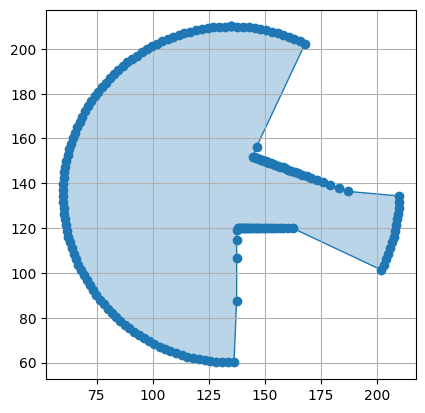

In [60]:
import shapely.ops as ops
import shapely.plotting
polygon
shapely.plotting.plot_polygon(ops.polygonize(polygon)[0])